# Purpose {-}  
This lab introduces the three possible configurations for RLC circuits, critically-damped, over-damped, under-damped.  

# Preliminary {-}  
1. Write a python program that will determine the voltage across the capacitor of an RLC circuit given the following values:
    - resistance
    - capacitance
    - inductance
    - initial voltage across the capacitor
    - final voltage across the capacitor
    - initial current across the capacitor
    - time  
2. Recreate the [RLC circuit](#the-rlc-circuit) in LTspice and simulate the oscilloscope reading when the circuit is critically damped.
3. Build the [RLC circuit](#the-rlc-circuit) on a breadboard and use an oscilloscope the measure the voltage over the capacitor.

## Equipment {-}  
- Breadboard  
- Multimeter  
- Power Supply  
- Wave Generator  
- Oscilloscope  
- Inductor: $1mH$  
- Capacitor $.01\mu F$  
- Potentiomter: $1k\Omega$  

## The RLC Circuit {-}  
![RLC Circuit](RLC_Circuit.png)

# Python Code {-}  
Author(s): Hunter Van Horn, Dexter Ward  
Date: 02/20/2025  
This program will graph a series RLC circuit with variable resistance values  

## Dependancies {-}  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Voltage Across the Capacitor  {-}

In [2]:
'''
r - float, value of the resistor
c - float, value of the capacitor
l - float, value of the inductor
vco - float, initial voltage across the capacitor
vcf - float, final voltage across the capacitor
ico - float, initial current through the capacitor
t - array, values of time to measure the RLC circuit across
'''
def seriesRLC(r, c, l, vco, vcf, ico, t):
    p1 = 1
    p2 = r/l
    p3 = 1/(c*l)
    s1, s2 = np.roots([p1,p2,p3])

    if(s1.imag):
        matrix = np.array([[1,0],[s1.real, s1.imag]])
        answers = np.array([vco-vcf, ico/c])

        a, b = np.linalg.solve(matrix,answers)
        return a*np.exp(s1.real*t)*np.cos(s1.imag*t)+b*np.exp(s1.real*t)*np.sin(s1.imag*t)+vcf
    elif(s1 != s2):
        matrix = np.array([[1,1],[s1, s2]])
        answers = np.array([vco-vcf, ico/c])

        a, b = np.linalg.solve(matrix,answers)
        return a*np.exp(s1*t)+b*np.exp(s2*t)+vcf
    else:
        matrix = np.array([[1,0],[s1,1]])
        answers = np.array([vco-vcf, ico/c])

        a, b = np.linalg.solve(matrix,answers)
        return a*np.exp(s1*t)+b*np.exp(s2*t)*t+vcf

The series RLC fuction uses the values for the resistor, inductor, and capacitor in order to determine the coefficients of the characteristic equation. Using those coefficients the program is able to determine the roots of the characteristic equation. The roots are used to determine which equation relates to the given circuit and can then be used to determine the voltage by creating a system of equations for $V_c(t)$ and $\frac{dV_c(t)}{dt}$ and using a matrix to solve for the unkown coefficients. Once the voltage equation coefficients are determined the program returns the values for the given RLC circuit.

## Graphing  {-}

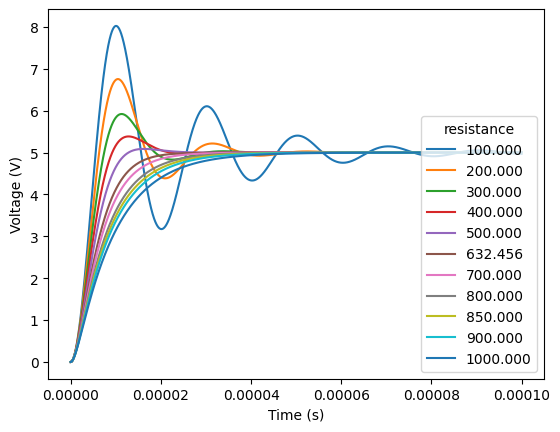

In [3]:
if __name__ == "__main__":
    c = .01E-6
    l = 1E-3
    r = [100, 200, 300, 400, 500, (2*np.sqrt(l/c)), 700, 800, 850, 900, 1000]
    vco = 0
    vcf = 5
    ico = 0
    t = np.arange(0, .0001, .00000001)
    
    for iter in r:
        voltages = seriesRLC(iter, c, l, vco, vcf, ico, t)
        plt.plot(t,voltages, label=f'{iter:.3f}')    

    plt.legend(title='resistance', loc='lower right')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.show()

# LTspice Simulation {-}  
We built the [RLC circuit](#the-rlc-circuit) in LTspice and set the resitor value to the lowest value before it produced an underdamped output. The voltage source simulated a 5V pulse wave with a .2ms period and a rise/fall time of 1ns. The oscilloscope simulates the voltage across the capacitor over a two period (.4ms) interval.

## Circuit {-}  
![LTspice Circuit](LTspice_Circuit.png)  

## Oscilloscope {-}   
![LTspice Oscilloscope](LTspice_Oscilloscope.png)

# Breadboard Circuit {-}  
We built the [RLC Circuit](#The-RLC-Circuit) on a breadboard and then adjusted the potentiometer until we go the desired output on the oscilloscope that represented an overdamped, critically damped, and underdamped system. Once we had obtained the desired result we removed the potentiometer from the circuit and used a multimeter to measure the resistance. Both the outputted curve and the resistance reading for each scenario are represented in this section.

## Overdamped {-}  
![The Overdamped Curve](BB_over_curve.png)
![The Overdamped Resistance](BB_over_res.png)  

## Critically Damped {-}  
![The Critically Damped Curve](BB_crit_curve.png)
![The Critically Damped Resistance](BB_crit_res.png)

## Underdamped {-}  
![The Underdamped Curve](BB_under_curve.png)
![The Underdamped Resistance](Backup_Images/BB_under_res_bu.jpg)

# Conclusion {-}  
| | Python | LTspice | Experimental | Analytical |
| --- | --- | --- | --- | --- |
|Resistance (critically damped) | 632.456 $\Omega$ | 623 $\Omega$ | 635.35 $\Omega$ | 632.456 $\Omega$ |
| % Error | 0.000% | 1.495% | 0.458% | 0.000% |


In this lab my lab partner, Dexter Ward, and I created a python program that graphed the voltage across the capacitor of an RLC circuit with variable resistance values. The program uses the RLC characteristic equation and general solution for various RLC circuits (over, under, and critically damped) to determine the equation for voltage across a the capacitor. Then we recreated the circuit in the LTspice simulator and found the resistance value that produced a critically damped circuit. We finally built the circuit on a breadboard, using a potentiometer, and varied the potentiometer while the voltage across the capacitor was being read by an oscilloscope. Once we produced the three different RLC circuits we disconnected the potentiometer and used a multimeter to determine the resistance that was being used in the circuit. As the table above shows the percentage error for each calculation method was within 2% of the calculated value for the resistance necessary to 